In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [2]:
#import dataset
df = pd.read_csv('salary.csv')
df

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.00000,0,0,0,1.17,1,0,1,1,3,0
1,58000.00000,1,0,0,1.24,1,0,1,1,2,0
2,45500.00000,0,0,0,1.21,1,0,1,1,3,2
3,35782.00000,0,2,1,0.99,1,0,1,1,4,1
4,34731.00000,0,2,2,0.91,1,0,1,1,4,1
5,56000.00000,1,0,0,1.19,1,0,1,1,1,0
6,61008.00000,0,2,2,1.33,1,0,1,1,2,0
7,39986.00000,0,2,0,0.99,1,0,1,1,4,0
8,36308.00000,0,2,1,0.85,1,0,1,1,1,1
9,55000.00000,0,0,0,1.23,1,0,1,1,1,1


In [3]:
df = df[['salary', 'yearsworked']]
df
# I placed my focus on these two since we are working with just the two

,salary,yearsworked
0,53000.00000,0
1,58000.00000,0
2,45500.00000,0
3,35782.00000,2
4,34731.00000,2
5,56000.00000,0
6,61008.00000,2
7,39986.00000,2
8,36308.00000,2
9,55000.00000,0


In [4]:
df.info() #to get info about the two columns in our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 2 columns):
salary         513 non-null float64
yearsworked    514 non-null int64
dtypes: float64(1), int64(1)
memory usage: 8.1 KB


In [5]:
df.head()

,salary,yearsworked
0,53000.0,0
1,58000.0,0
2,45500.0,0
3,35782.0,2
4,34731.0,2


In [6]:
df.isnull().sum()
# we can pick up if there is a missing value

salary         1
yearsworked    0
dtype: int64

In [7]:
nan_rows = df[df.isnull().any(1)]
print(nan_rows)
#the missing value is n row 208 in the salary column

     salary  yearsworked
208     NaN           21


In [8]:
df_salary = df.dropna()
#dropping the missing values

In [9]:
df_salary.isnull().sum()
#checking if there are still missing values

salary         0
yearsworked    0
dtype: int64

In [10]:
df_salary.describe()

,salary,yearsworked
count,513.000000,513.000000
mean,50863.220098,12.836257
std,12685.132358,9.447040
min,29000.000000,0.000000
25%,40000.000000,4.000000
50%,50096.000000,12.000000
75%,60345.000000,22.000000
max,96156.000000,41.000000


In [11]:
df_salary.var()
#finding the variance

salary         1.609126e+08
yearsworked    8.924657e+01
dtype: float64

In [12]:
df_salary.corr()
# finding the correlation between the two

,salary,yearsworked
salary,1.000000,0.623589
yearsworked,0.623589,1.000000


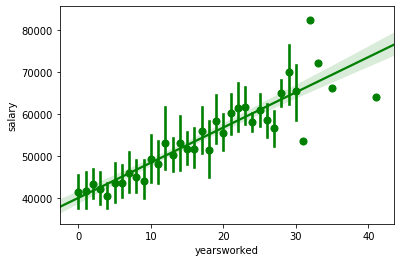

In [13]:
sns.regplot(x='yearsworked', y='salary', data=df_salary, x_estimator=np.mean, color="g")

# already from the plot we can see that with the increase in years worked so does the salary. the exception is with
#the noticable outliers, which could be telling us that the workers could have qualifications as an advantage / 
# disadvantage

## Test, Train and Split

Under Simple Linear Regression, only one independent/input variable is used to predict the dependent variable. It has the following structure:

Y = C + M*X

   Y = Dependent variable (output/outcome/prediction/estimation)
   C = Constant (Y-Intercept)
   M = Slope of the regression line (the effect that X has on Y)
   X = Independent variable (input variable used in the prediction of Y)

In [14]:
X = df_salary[['yearsworked']]
Y = df_salary[['salary']]

len(X), len(Y)

(513, 513)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101) 
model = LinearRegression()
results = model.fit(X_train, Y_train)

print(model.intercept_, model.coef_)

[40819.98836101] [[774.76879966]]


In [16]:
X = sm.add_constant(X)
model = smf.OLS(Y_train,X_train).fit()
predictions = model.predict(X_train)

model.summary()

/home/johanna/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1093.
Date:                Tue, 21 May 2019   Prob (F-statistic):          7.81e-111
Time:                        14:31:54   Log-Likelihood:                -4158.9
No. Observations:                 359   AIC:                             8320.
Df Residuals:                     358   BIC:                             8324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2840.0566     85.905     33.061      0.000    2671.115    3008.998
==============================================================================
Omnibus:                        5.971   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                3.760
Skew:                          -0.029   Prob(JB):                        0.153
Kurtosis:                       2.502   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# scikit-learn prediction
model.predict(80)

array([227204.5256618])

In [18]:
# statsmodel, the confidence intervals for the model coefficients

print(model.conf_int())

                      0            1
yearsworked  2671.11523  3008.997912


In [19]:
# print the p-values for the model coefficients 

model.pvalues

yearsworked    7.806942e-111
dtype: float64

In [20]:
# print the rsqaured for the model in statsmodel

model.rsquared

0.7532734098571672

## Questions and answers

Q1: Using the statsmodels package, run a simple linear regression for Salary with one predictor variable: Years Worked.

   * Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.
   * What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?


A: Yes it does significantly predict the dependent variable.

- Rsquared(variance) = 0.753
- Significance value(p) = 7.81

Q2: What does the unstandardized coefficient (B or 'coef' in statsmodels) tell you about the relationship between Years Worked and Salary?

A: The unstandardized coefficient is 2840.06, which indicates that as the value of the years worked increases, the average salary also increases by 2840.06 dollars

Q3: What do the 95% confidence intervals [0.025, 0.975] mean?

A: The 95% confidence intervals [0.025, 0.975] mean that if we were to take 100 different samples and compute 95% confidnce interval for each sample, then approximately 95 out of the 100 confidence intervals will contain the true mean value

Q4: Calculate the expected salary for someone with 12 years’ work experience.

In [21]:
# statsmodel prediction

X_12yrs = pd.DataFrame({'salary': [12]})
model.predict(X_12yrs)



0    34080.678849
dtype: float64

A: The expected salary for someone with 12 years work experience is 34080.69 dollars

Q5: Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

In [22]:
X_80yrs = pd.DataFrame({'salary': [80]})
model.predict(X_80yrs)

0    227204.525662
dtype: float64

A: The expected salary for someone with 80 years work experience is 227204.53 dollars. 

Apart from it being a bit odd for someone to have so much work experience, the prediction is quite fair. The person with 80 years work experience will be getting just abit over six times more salary than the person with 12 years work experience.

Q6: We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

A: 
* Department or division an individual may be working in
* Qualifications, also scarcity in certain talents of labour
* The market value, how much other employees in surrounding arrears could be paying for that job
* The requirements of an emploee in terms of incentives
* Gender
* General economic conitions , i.e inflation

In [23]:
X = sm.add_constant(X)
model = smf.OLS(Y_test,X_test).fit()
predictions = model.predict(X_train)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     517.9
Date:                Tue, 21 May 2019   Prob (F-statistic):           5.68e-51
Time:                        14:31:55   Log-Likelihood:                -1778.7
No. Observations:                 154   AIC:                             3559.
Df Residuals:                     153   BIC:                             3563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2927.6300    128.645     22.757      0.000    2673.479    3181.781
==============================================================================
Omnibus:                        6.804   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                3.287
Skew:                           0.002   Prob(JB):                        0.193
Kurtosis:                       2.284   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now fit your model to your test set.

Q7: How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?


In [24]:
np.sqrt(mean_squared_error(Y_train, predictions))

26035.945302584565

In [25]:
test_predictions = model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,test_predictions))

25118.76901253

A: There is a difference of 917.176290 in the Root Mean Square Error between the training and test set.
